In [1]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image


def get_all_korean():

    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()

    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns

def merge_img(img0, img1, img2):
    mmg = Image.new("L", (128*2, 128*2), 255)
    mmg.paste(img0, (0,0))
    mmg.paste(img1, (128,0))
    if img2 is not None:
        mmg.paste(img2, (64,128))
    return mmg.resize((96,96), Image.BILINEAR)

def get_imgs(fd, font, tag, letter):
    
    ch1_list = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    ch2_list = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    ch3_list = [None, 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2

    return (
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch1_list[ch1]}.png"),
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch2_list[ch2]}.png"),
        None if ch3_list[ch3] is None else Image.open(f"{fd}/{font}/{font}__{tag}__{ch3_list[ch3]}.png"),
    )

In [2]:
originalfd = "/home/jupyter/ai_font/data/train"
partfd = "/home/jupyter/ai_font/data/train_parts"
assemblefd = "/home/jupyter/ai_font/data/train_assembled"
ak = get_all_korean()

In [ ]:
for font in tqdm(os.listdir(partfd)):
    os.makedirs(f"{assemblefd}/{font}", exist_ok=True)
    for tag in ['closing','erode','dilate']:
        for letter in ak:
            if os.path.exists(f"{originalfd}/{font}/{font}__{tag}__{letter}.png"):
                img0, img1, img2 = get_imgs(partfd, font, tag, letter)
                img = merge_img(img0,img1,img2)
                img.save(f"{assemblefd}/{font}/{font}__{tag}__{letter}.png")

100%|██████████| 422/422 [2:48:43<00:00, 23.99s/it]  


In [ ]:
a = get_imgs("/home/jupyter/ai_font/data/train_parts", "트와이스나연", "dilate", "량")

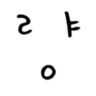

In [ ]:
merge_img(a[0], a[1], a[2])

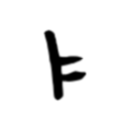

In [ ]:
a[1]

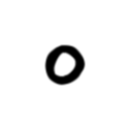

In [17]:
a[2]